In [6]:
import numpy as np
import sympy as sym
import scipy
import matplotlib.pyplot as plt
from scipy.linalg import null_space

### General Linear Models
A  statistical  model  is  a  set  of  equations  that  relates  predictors  (called  independent variables)  to  observations  (called  the dependent  variable).  In  the  model  of  the  stock market,  the  independent  variable  is  time  and  the  dependent  variable  is  stock  marketprice (e.g., quantified as the S&P 500 index).<br>
In  this  book  I  will  focus  on  general  linear  models,  which  are  abbreviated  as  GLM. Regression is a type of GLM, for example.<br>
Statisticians   use   slightly   different   terminology   than   do   linear   algebraticians. Table  11-1  shows  the  key  letters  and  descriptions  for  vectors  and  matrices  used  in the GLM.<br>
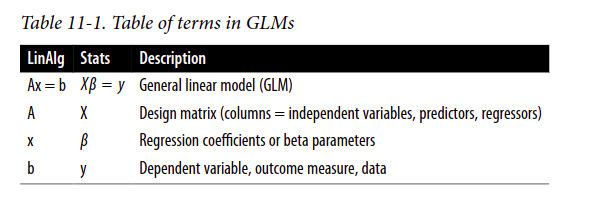

### Setting Up a General Linear Model
Setting  up  a  GLM  involves:-
1. Defining  an  equation  that  relates  the  predictor  variables  to  the  dependent  variable.
2. Mapping  the  observed  data  onto  the  equations.
3. Transforming  the  series  of  equations  into  a  matrix  equation.
4. Solving  that equation.

I have a model that predicts adult height based on weight and on parents’ height. The equation looks like this:
$$ y=β_0 + β_1w + β_2ℎ + ε $$
$y$ is the height of an individual, $w$ is their weight, and h is their parents’ height (the average of   mother and father). $ε$ is  an error term (also called a residual),  because we cannot reasonably  expect  that  weight  and  parents’  height perfectly  determine  an  individual’s height;  there  are  myriad  factors  that  our  model  does  not  account  for,  and  the  variance not attributable to weight and parents’ height will be absorbed by the residual.<br>
My  hypothesis  is  that  weight  and  parent's height  are  important  for  an  individual’s height,  but  I  don’t  know  how  important each  variable  is.  Enter  the  $β$  terms:  they  are the coefficients, or weights, that tell me how to combine weight and parent's height to predict  an  individual’s  height.  In  other  words,  a  linear  weighted  combination,  where the $β$s are the weights.<br>
$β_0$  is  called  an  intercept  (sometimes  called  a  constant).  The  intercept  term  is  a  vector of  all  1s.  Without  an  intercept  term,  the  best-fit  line  is  forced  to  pass  through  the origin.<br><br>
Next, we need to map the observed data onto the equations.
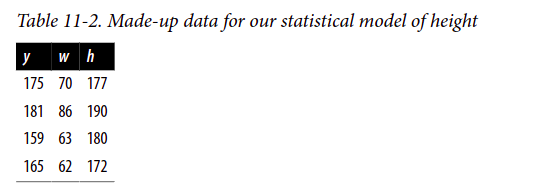
<br>
Mapping  the  observed  data  onto  our  statistical  model  involves  replicating  the  equation four times (corresponding to four observations in our dataset), each time replacing the variables y, w, and h with the measured data:
$$
175  = β_0+ 70β_1+ 177β_2
$$
$$
181  = β_0+ 86β_1+ 190β_2
$$
$$
159  = β_0+ 63β_1+ 180β_2
$$
$$
165  = β_0+ 62β_1+ 172β_2
$$
### And, of course, we can express this equation succinctly as Xβ=y

### Solving GLMs
To  solve  for  the  vector of  unknown  coefficients  β,  simply  left-multiply  both  sides  of  the  equation  by  the left-inverse of X, the design matrix. The solution looks like this:
$$
Xβ=y
$$
$$
(X^TX)^{-1}X^TXβ=(X^TX)^{-1}X^Ty
$$
$$
β=(X^TX)^{-1}X^Ty
$$
$β=(X^TX)^{-1}X^Ty$ It  is  called  the  least  squares  solution  and  is  one  of  the  most  important  mathematical equations  in  applied  linear  algebra. You  might  see  different  letters,  or  possibly  some  additions,  like  the following:
$$b = (H^TWH + λL^TL)^{−1}H^Tx$$
The  meaning  of  that  equation  and  the  interpretation  of  the  additional  matrices  are not  important  (they  are  various  ways  of  regularizing  the  model  fitting);  what  is important  is  that  you  are  able  to  see  the  least  squares  formula  embedded  in that complicated-looking equation (for example, imagine setting W=I and λ= 0).
The  least  squares  solution  via  the  left-inverse  can  be  translated  directly  into  Python code (variable X is the design matrix and variable y is the data vector):
#### X_leftinv = np.linalg.inv(X.T@X) @ X.T <br>beta = X_leftinv @ y


### Is the Solution Exact?
The equation Xβ=y is exactly solvable when y is in the column space of the designmatrix  X.  So  the  question  is  whether  the  data  vector  is  guaranteed  to  be  in  the column space of the statistical model. The answer is no, there is no such guarantee. Infact, the data vector y is almost never in the column space of X.<br>
To  understand  why  not,  let’s  imagine  a  survey  of  university  students  in  which  the researchers  are  trying  to  predict  average  GPA  (grade  point  average)  based  on  drinking behavior. The survey may contain data from two thousand students yet have only three  questions  (e.g.,  how  much  alcohol  do  you  consume;  how  often  do  you  blackout; what is your GPA). The data is contained in a 2000 × 3 table. The column space of the design matrix is a 2D subspace inside that 2000D ambient dimensionality, and the data vector is a 1D subspace inside that same ambient dimensionality.<br>
If  the  data  is  in  the  column  space  of  the  design  matrix,  it  means  that  the  model accounts  for  100%  of  the  variance  in  the  data.  But  this  almost  never  happens:  real-world data contains noise and sampling variability, and the models are simplifications that  do  not  account  for  all  of  the  variability  (e.g.,  GPA  is  determined  by  myriad factors that our model ignores).
The  solution  to  this  conundrum  is  that  we  modify  the  GLM  equation  to  allow  fora  discrepancy  between  the  model-predicted  data  and  the  observed  data.  It  can  beexpressed in several equivalent (up to a sign) ways:
$$
Xβ=y+ε
$$
The  interpretation  of  the  first  equation  is  that  ε  is  a  residual,  or  an  error  term,  that you add to the data vector so that it fits inside the column space of the design matrix.<br>
$$
Xβ+ε=y
$$
The  interpretation  of  the  second  equation  is  that  the  residual  term  is  an  adjustment to  the  design  matrix  so  that  it  fits  the  data  perfectly.<br>
$$
ε = Xβ - y
$$
Finally,  the  interpretation of  the  third  equation  is  that  the  residual  is  defined  as  the  difference  between  themodel-predicted data and the observed data.<br>
The point of this section is that the observed data is almost never inside the subspace spanned  by  the  regressors.  For  this  reason,  it  is  also  common  to  see  the  GLM expressed as<b> X=βy where y=y+ε</b><br>
Therefore, the goal of the GLM is to find the linear combination of the regressors thatgets as close as possible to the observed data.

### A Geometric Perspective on Least Squares
geometric  perspective  to  the  GLM, provides an alternative perspective and helps reveal several important features of the least squares solution.<br>
Let’s consider that the column space of the design matrix CX is a subspace of $ℝ^M$.It’s  typically  a  very  low-dimensional  subspace  (that  is,  N  <<  M),  because  statistical models tend to have many more observations (rows) than predictors (columns). The dependent  variable  is  a  vector  $y ∈ ℝ^M$.<br>
So,  our  goal  is  to  find  the  set  of  coefficients  β  such  that  the  weighted  combination of columns in X minimizes the distance to data vector y. We can call that projection vector  ε.  How  do  we  find  the  vector  ε  and  the  coefficients  β?  We  use  orthogonal vector  projection. This  means  we  can  apply the  same  approach  as  in  Chapter  2,  but  using  matrices  instead  of  vectors.  The  key insight is that the shortest distance between y and X is given by the projection vector y−Xβ that meets X at a right angle:
$$
X^Tε=0
$$
$$
X^T(y−Xβ)=0
$$
$$
X^Ty−X^TXβ=0
$$
$$
X^TXβ=X^Ty
$$
$$
β=X^TX^{−1}X^Ty
$$
That  progression  of  equations  is  remarkable:  we  started  from  thinking  about  the GLM  as  a  geometric  projection  of  a  data  vector  onto  the  column  space  of  a  design matrix,  applied  the  principle  of  orthogonal  vector  projection  that  you  learned  about early on in the book, and voilà! We have rederived the same left-inverse solution that we got from the algebraic approach.

### Why Does Least Squares Work?
Why is it called “least squares”? What are these so-called squares, and why does this method give us the least of them?<br>
The  “squares”  here  refers  to  squared  errors  between  the  predicted  data  and  the observed  data.  There  is  an  error  term  for  each  $i^{th}$  predicted  data  point,  which  is defined  as  $ε_i=X_iβ−y_i$.  Note  that  each  data  point  is  predicted  using  the  same  set of  coefficients  (that  is,  the  same  weights  for  combining  the  predictors  in  the  design matrix). We can capture all errors in one vector:<br> <b> ε = Xβ − y</b><br>
If  the  model  is  a  good  fit  to  the  data,  then  the  errors  should  be  small.  Therefore,  we can say that the objective of model fitting is to choose the elements in β that minimize the  elements  in  ε.  But  just  minimizing  the  errors  would  cause  the  model  to  predict values toward negative infinity. Thus, instead, we minimize the squared errors, which correspond to their geometric squared distance to the observed data y, regardless of whether  the  prediction  error  itself  is  positive  or  negative.2  This  is  the  same  thing  as minimizing  the  squared  norm  of  the  errors.  Hence  the  name  “least  squares.”  That leads to the following modification:
$$ ∥ ε ∥^2=∥ Xβ − y ∥^2$$
<br>
We  can  now  view  this  as  an  optimization  problem.  In  particular,  we  want  to  find the  set  of  coefficients  that  minimizes  the  squared  errors.  That  minimization  can  be expressed as follows:
$$ min_β ∥ Xβ − y ∥^2 $$
The  solution  to  this  optimization  can  be  found  by  setting  the  derivative  of  the objective to zero and applying a bit of differential calculus and a bit of algebra:<br>
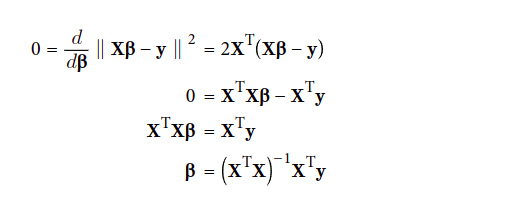 <br>
Amazingly  enough,  we  started  from  a  different  perspective—minimizing  the  squared distance between the model-predicted values and the observed values—and again we rediscovered  the  same  solution  to  least  squares  that  we  reached  simply  by  using  our linear algebra intuition.

### Least Squares via QR
The  left-inverse  method  is  theoretically  sound,  but  risks  numerical  instability.  Thisis  partly  because  it  requires  computing  the  matrix  inverse,  which  you  already  know can be numerically unstable. But it turns out that the matrix $X^TX$ itself can introduce difficulties. Multiplying a matrix by its transpose has implications for properties such as  the  norm  and  the  condition  number. Matrices  with  a  high  condition  number  can  be  numerically  unstable,  and  thus  a  design  matrix  with  a  high condition number will become even less numerically stable when squared.
QR  decomposition  provides  a  more  stable  way  to  solve  the  least  squares  problem.Observe the following sequence of equations:
$$
Xβ=y$$
$$QRβ=y$$
$$Rβ=Q^Ty$$
$$β=R^{−1}Q^Ty$$<br>
The  conclusion  here  is  that  QR  decomposition  solves  the  least  squares  problem without  squaring  $X^TX$  and  without  explicitly  inverting  a  matrix.  The  main  risk  ofnumerical  instability  comes  from  computing  Q,  although  this  is  fairly  numerically stable when implemented via Householder reflections.

## Code Exercises

### Question 11-1. I  explained  that  the  residuals  are  orthogonal  to  the  predicted  data  (in  other  words,$ε^Ty= 0$).  Illustrate  this  in  the  toy  dataset  from  this  chapter.  In  particular,  make  a scatterplot  of  the  predicted  data  by  the  errors  (as  in  Figure  11-6).  Then  computethe dot product and the correlation coefficient between the residuals and the model predicted  data.  In  theory,  both  should  be  exactly  zero,  although  there  are  some rounding errors. Which of those two analyses (dot product or correlation) is smaller,and why is that?
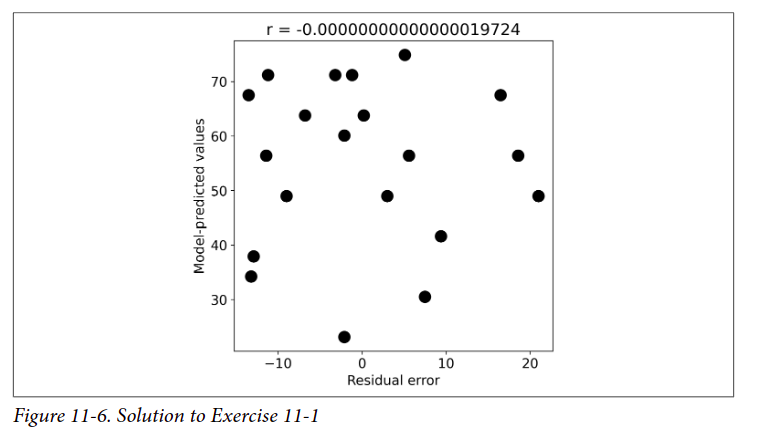

Dot product: 5.4569682106375694e-12
Correlation: -0.6444852258446189
 


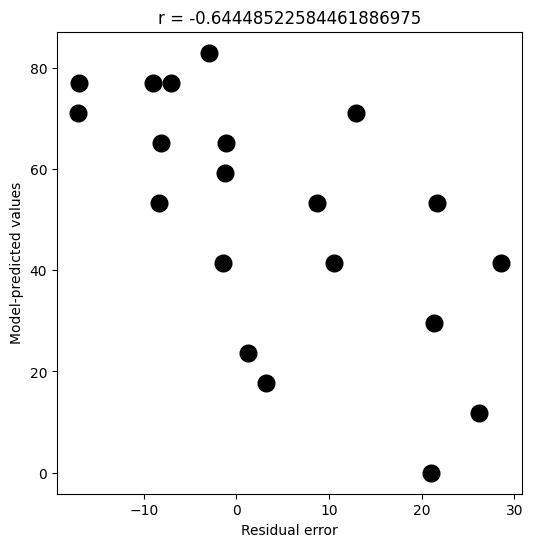

In [3]:
happiness = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
X = np.array(numcourses,ndmin=2).T
# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T
# solve for the coefficients
beta = X_leftinv @ happiness
pred_happiness = X@beta
# compute residual
res = happiness-pred_happiness
# should be zero + some error
print('Dot product: ' + str(np.dot(pred_happiness,res)) )
print('Correlation: ' + str(np.corrcoef(pred_happiness,res)[0,1]))
print(' ')


# show in a plot
plt.figure(figsize=(6,6))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.show()

In [4]:
# correlation is smaller because we're dividing by the vector norms, e.g.,
np.linalg.norm(res)

63.97455705574157

### Question 11-2.The model-predicted happiness is merely one way of linearly combining the columnsof  the  design  matrix.  But  the  residuals  vector  isn’t  only  orthogonal  to  that  one linear weighted combination; instead, the residuals vector is orthogonal to the entire subspace  spanned  by  the  design  matrix.  Demonstrate  this  in  Python  (hint:  think  ofthe left-null space and rank).

In [7]:
# the residual is orthogonal to the entire column space of the design matrix.
# compute the null space (via scipy.linalg)
nullspace = null_space(X.T)


# augment the residuals
nullspaceAugment = np.hstack( (nullspace,res.reshape(-1,1)) )


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 19
dim( [N(X)|r] ) = 19


### Question 11-3.You  are  now  going  to  compute  least  squares  via  QR  decomposition.In  particular,  compute  and  compare  the following solution methods: (1) the left-inverse $X^TX^{−1}X^Ty$, (2) QR with the inverseas R^{−1}Q^Ty, and (3) Gauss-Jordan elimination on the matrix R augmented with Q^Ty.Print out the beta parameters from the three methods as follows. (Rounding to three digits after the decimal point is an optional extra coding challenge.)

In [8]:
# random design matrix and data vector
M,N = 20,3
X = np.random.randn(M,N)
happiness = np.random.randn(M,1)


# recreate the design matrix and solution via left-inverse
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta1 = np.linalg.inv(X.T@X) @ X.T @ happiness


# QR decomp
Q,R = np.linalg.qr(X)

# beta coefficients implemented as translation of the math
beta2 = np.linalg.inv(R) @ (Q.T@happiness)

# and using back-substitution via RREF
# Q'y, but needs to be reshaped into a column vector
tmp = (Q.T@happiness).reshape(-1,1)
Raug = np.hstack( (R,tmp) ) # augment the matrix
Raug_r = sym.Matrix(Raug).rref()[0] # this gets the matrix
beta3 = np.array(Raug_r[:,-1]) # convert back to numpy


print('Betas from left-inverse: ')
print(np.round(beta1,3)), print(' ')

print('Betas from QR with inv(R): ')
print(np.round(beta2,3)), print(' ')

print('Betas from QR with back-substitution: ')
print(np.round(np.array(beta3.T).astype(float),3))

Betas from left-inverse: 
[[-0.281]
 [ 0.015]]
 
Betas from QR with inv(R): 
[[-0.281]
 [ 0.015]]
 
Betas from QR with back-substitution: 
[[-0.281  0.015]]


In [9]:
# show the matrices
print('Matrix R:')
print(np.round(R,3)) # note that it's upper-triangular (as you know!)

print(' ')
print("Matrix R|Q'y:")
print(np.round(Raug,3))

print(' ')
print("Matrix RREF(R|Q'y):")
print(np.round(np.array(Raug_r).astype(float),3)) # convert to numpy floats

Matrix R:
[[ -4.472 -38.237]
 [  0.     17.747]]
 
Matrix R|Q'y:
[[ -4.472 -38.237   0.701]
 [  0.     17.747   0.257]]
 
Matrix RREF(R|Q'y):
[[ 1.     0.    -0.281]
 [ 0.     1.     0.015]]


### Question 1-4.Outliers are data values that are unusual or nonrepresentative. Outliers can cause sig‐nificant problems in statistical models, and therefore can cause significant headachesfor  data  scientists.  In  this  exercise,  we  will  create  outliers  in  the  happiness  data  toobserve the effects on the resulting least squares solution.In  the  data  vector,  change  the  first  observed  data  point  from  70  to  170  (simulatinga  data-entry  typo).  Then  recompute  the  least  squares  fit  and  plot  the  data.  Repeatthis  outlier  simulation  but  change  the  final  data  point  from  70  to  170  (and  set  thefirst data point back to its original 70). Compare with the original data by creating avisualization like Figure 11-7.Interestingly,  the  outlier  was  identical  in  the  outcome  variable  (in  both  cases,  the  70turned into 170), but the effect on the fit of the model to the data was quite differentbecause of the corresponding x-axis value. This differential impact of outliers is called leverage  and  is  something  you  would  learn  about  in  a  deeper  discussion  of  statisticsand model fitting
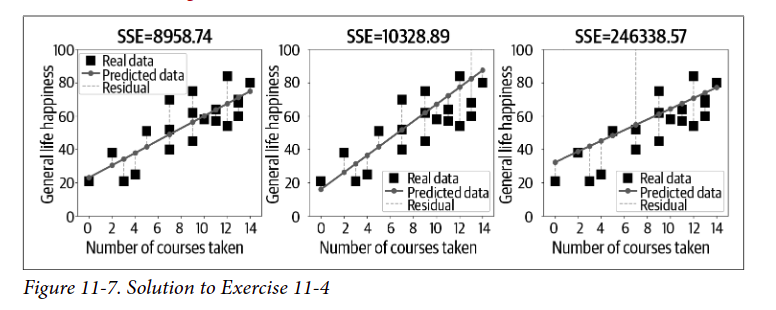

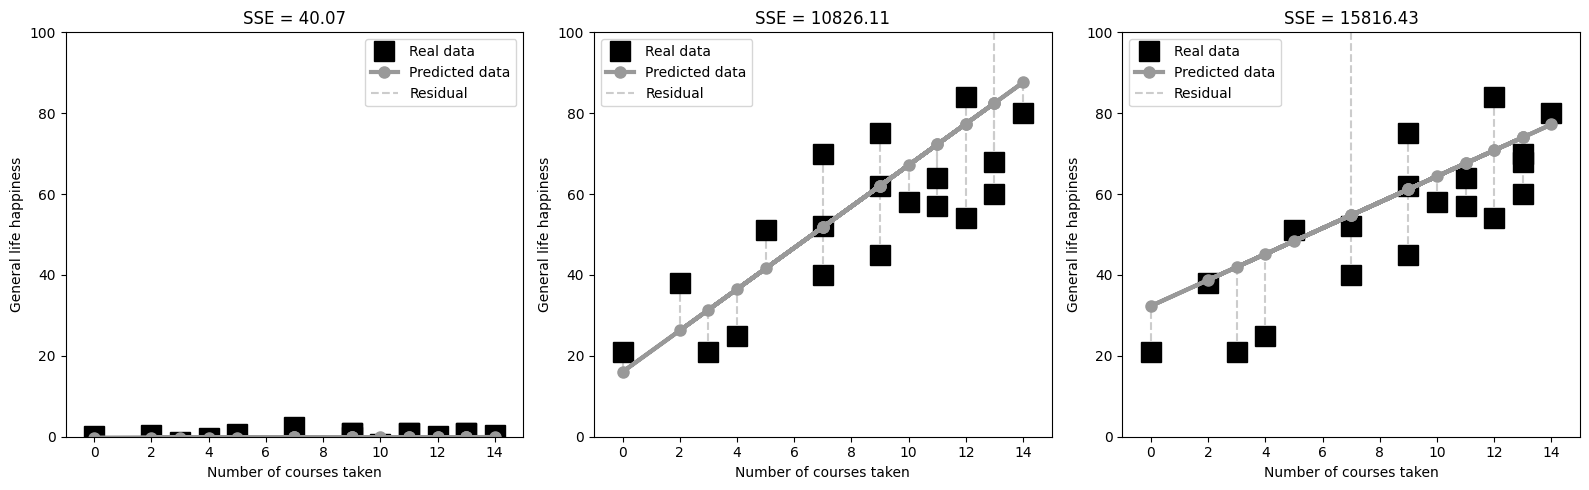

In [10]:
# happiness with outliers
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]


# design matrix and its left-inverse (doesn't change with the data)
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
X_leftinv = np.linalg.inv(X.T@X) @ X.T



_,axs = plt.subplots(1,3,figsize=(16,5))

for axi,y in zip(axs,[happiness,happiness_oops1,happiness_oops2]):

  # compute the best-fit parameters
  beta = X_leftinv @ y

  # predicted data
  pred_happiness = X@beta


  # plot the data and predicted values
  axi.plot(numcourses,y,'ks',markersize=15)
  axi.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

  # plot the residuals (errors)
  for n,yy,yHat in zip(numcourses,y,pred_happiness):
    axi.plot([n,n],[yy,yHat],'--',color=[.8,.8,.8],zorder=-10)

  # make the plot look nicer
  axi.set(xlabel='Number of courses taken',ylabel='General life happiness',
          xlim=[-1,15],ylim=[0,100],xticks=range(0,15,2))
  axi.legend(['Real data','Predicted data','Residual'])
  axi.set_title(f'SSE = {np.sum((pred_happiness-y)**2):.2f}')



plt.tight_layout()
plt.show()


### Question 11-5.In  this  exercise,  you  will  compute  the  matrix  inverse  using  least  squares,  following the interpetation I introduced in the previous chapter. We will consider the equation XB=Y, where X is the square full-rank matrix to invert, B is the matrix of unknown coefficients  (which  will  be  the  matrix  inverse),  and  Y  is  the  “observed  data”  (the identity matrix).You  will  compute  B  in  three  ways.  First,  use  the  left-inverse  least  squares  method to  compute  the  matrix  one  column  at  a  time.  This  is  done  by  computing  the  least squares  fit  between  the  matrix  X  and  each  column  of  Y  in  a  for  loop.  Second,  use the  left-inverse  method  to  compute  the  entire  B  matrix  in  one  line  of  code.  Finally,compute $X^{−1}$ using the function np.linalg.inv(). Mutliply each of those B matrices by X and show in a figure like Figure 11-8. Finally, test whether these three “different” ways  of  computing  the  inverse  are  equivalent  (they  should  be,  because  the  matrix inverse is unique).<br>Observation:  it  is  rather  strange  (not  to  mention  circular)  to  use  the  inverse  of  $X^TX$ to compute the inverse of X. (Indeed, you should confirm with paper and pencil thatthe  left-inverse  reduces  to  the  full  inverse  for  square  full-rank  X!)  Needless  to  say,this is not a computational method that would be implemented in practice. However,this exercise reinforces the interpretation of the matrix inverse as the transformation that  projects  a  matrix  onto  the  identity  matrix,  and  that  that  projection  matrix  can be obtained via least squares. Comparing the least squares solution to np.linalg.inv also  illustrates  the  numerical  inaccuracies  that  can  arise  when  computing  the  left-inverse.
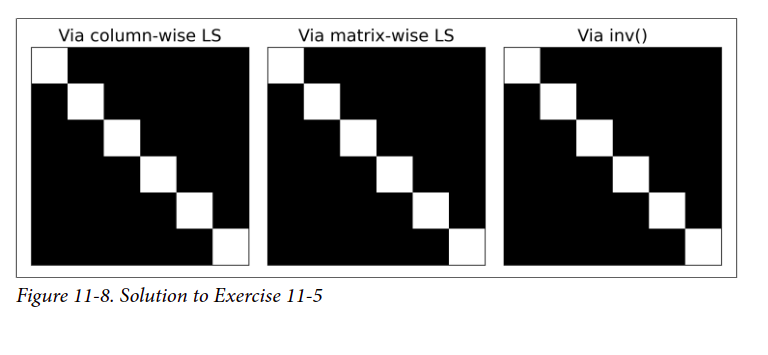

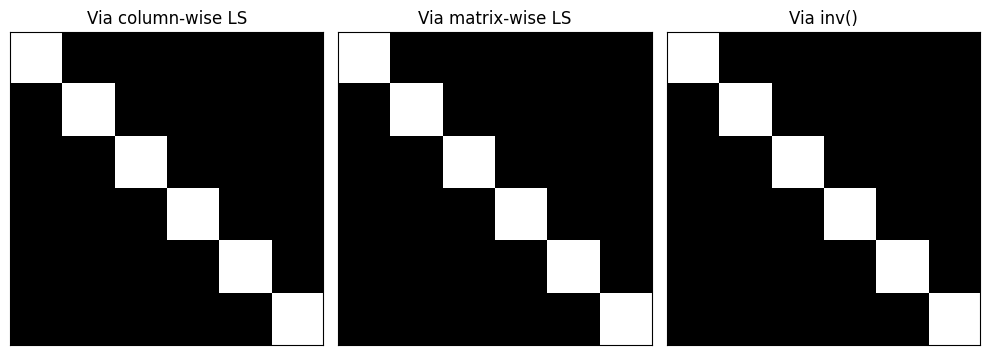

In [11]:
# matrix size
n = 6

# some random "design matrix"
X = np.random.randn(n,n)

# the target matrix (identity)
Y = np.eye(n)


# find the best-fitting model one column at a time
Xinv1 = np.zeros_like(X)

for coli in range(n):
  Xinv1[:,coli] = np.linalg.inv(X.T@X) @ X.T @ Y[:,coli]



# repeat but without a loop
Xinv2 = np.linalg.inv(X.T@X) @ X.T @ Y


# and the inverse using inv()
Xinv3 = np.linalg.inv(X)


# visualize
_,axs = plt.subplots(1,3,figsize=(10,6))

# column-wise least-squares
axs[0].imshow( Xinv1@X ,cmap='gray')
axs[0].set_title('Via column-wise LS')

# matrix-wise least-squares
axs[1].imshow( Xinv2@X ,cmap='gray' )
axs[1].set_title('Via matrix-wise LS')

# inv()
axs[2].imshow( Xinv3@X ,cmap='gray' )
axs[2].set_title('Via inv()')


# don't need the tick marks
for a in axs: a.set(xticks=[],yticks=[])

plt.tight_layout()
plt.show()


In [12]:
# show they are equivalent
# Note the relatively large rounding errors when comparing to inv() -- the left-inverse
#   least-squares method is not a numerically stable method!


print(Xinv1-Xinv2)
print(' ')

print(Xinv1-Xinv3)
print(' ')

print(Xinv2-Xinv3)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
 
[[-1.68753900e-14  9.95870053e-14  8.21565038e-15 -9.19264664e-14
  -1.13520304e-14 -1.43218770e-13]
 [-1.82298621e-13  7.40740802e-13 -9.10382880e-15 -6.29718500e-13
  -4.18554080e-14 -7.60280727e-13]
 [-4.86277685e-14  1.82742710e-13  7.21644966e-15 -1.60982339e-13
  -1.49880108e-14 -2.04281037e-13]
 [ 1.15685239e-13 -4.22772928e-13 -1.68198788e-14  3.33066907e-13
   1.69864123e-14  4.23661106e-13]
 [-2.41473508e-14  8.70414851e-14  1.07414078e-14 -7.29416527e-14
  -5.93969318e-15 -1.04583009e-13]
 [-3.34399175e-13  1.07291953e-12  2.46469511e-14 -8.57980353e-13
  -5.72875081e-14 -1.19193544e-12]]
 
[[-1.68753900e-14  9.95870053e-14  8.21565038e-15 -9.19264664e-14
  -1.13520304e-14 -1.43218770e-13]
 [-1.82298621e-13  7.40740802e-13 -9.10382880e-15 -6.29718500e-13
  -4.18554080e-14 -7.60280727e-13]
 [-4.86277685e-14  1.82742710e-13  7.21644966e-15 -1.6098233